### Title of ML project: "Rental Bike Count Prediction Model"
-----

### Name: Ramesh Krishnan

### Organization: Entri Elevate

### Date: 
-----

### Overview of Problem Statement:
Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike
available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city
with a stable supply of rental bikes becomes a major concern. Therefore, developing an effective prediction of bike count
required at each hour for the stable supply of rental bikes. 

### Objective:
To predict the count of bike required at each hour for the stable supply of rental bikes.

### Data Description:
#### Source: 
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

#### Features: 
'Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point', 'temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons	Holiday', 'Functioning Day'

### Data Collection:

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.pipeline import Pipeline

In [2]:
# Load Data
file = 'SeoulBikeData.csv'
data = pd.read_csv(file, encoding='latin1') # read file using 'latin1' encoding

In [3]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Data Preprocessing - Data Cleaning:

In [5]:
# Convert 'Date' column to datetime format for better analysis
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # Invalid dates are converted to NaT

# Extract year, month, day, and day of the week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

In [6]:
# Display the updated DataFrame
print(df[['Date', 'Year', 'Month', 'Day', 'Day_of_Week']].head())

        Date  Year  Month  Day  Day_of_Week
0 2017-12-01  2017     12    1            4
1 2017-12-01  2017     12    1            4
2 2017-12-01  2017     12    1            4
3 2017-12-01  2017     12    1            4
4 2017-12-01  2017     12    1            4


In [7]:
# Drop Date column from the data
df.drop(columns=['Date'],inplace=True)
print('Dataframe after removing date column permanantly\n')
df.head(5)

Dataframe after removing date column permanantly



,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_of_Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


In [8]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day', 'Day_of_Week'],
      dtype='object')

In [9]:
# Handle missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int32

In [9]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Day_of_Week
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,6.526027,15.720548,3.002740
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,3.448048,8.796749,1.998056
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000,16.000000,3.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,10.000000,23.000000,5.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000,31.000000,6.000000


In [11]:
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Month                        0
Day                          0
Day_of_Week                  0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
# There is no NULL values or Duplicates in the data

In [15]:
# Check for and remove outliers in numerical columns

In [10]:
# Splitting categorical and numerical columns
# Numerical columns
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Day_of_Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,12,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,12,1,4


In [11]:
# Categorical columns
categorical_columns = df.select_dtypes(include=['object']) 
categorical_columns.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


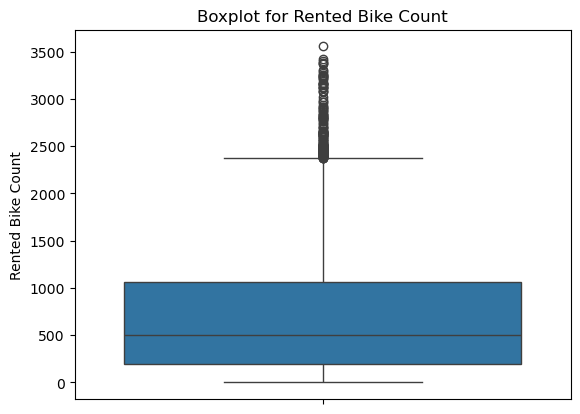

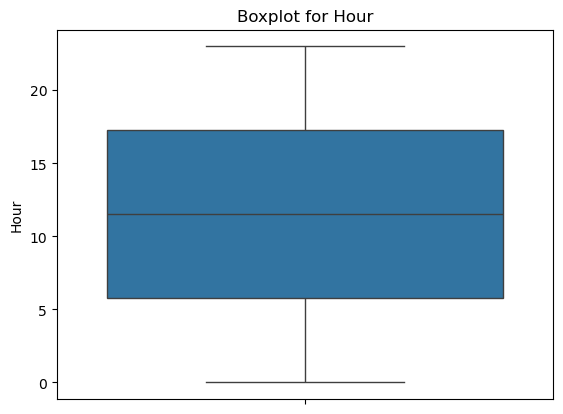

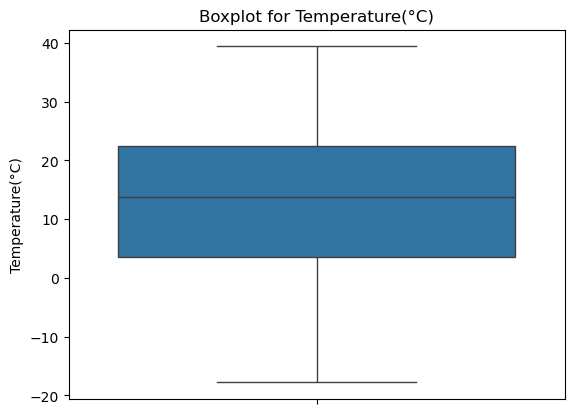

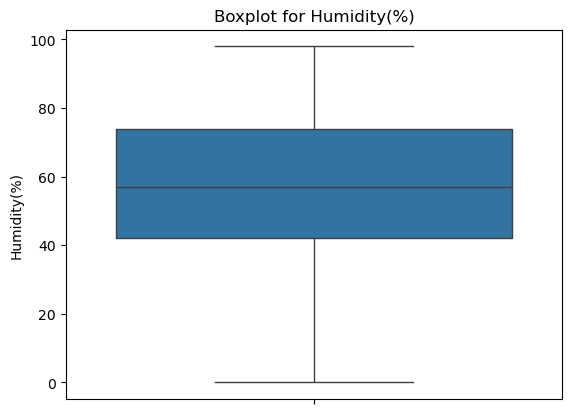

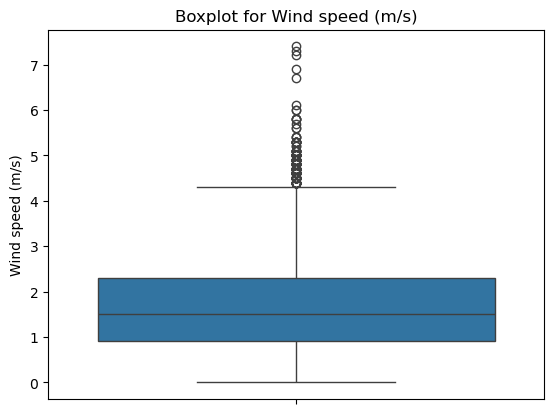

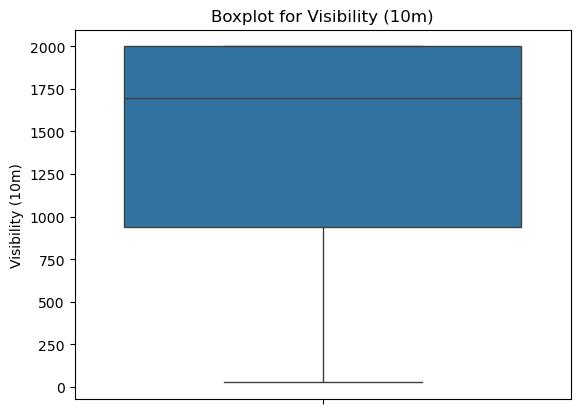

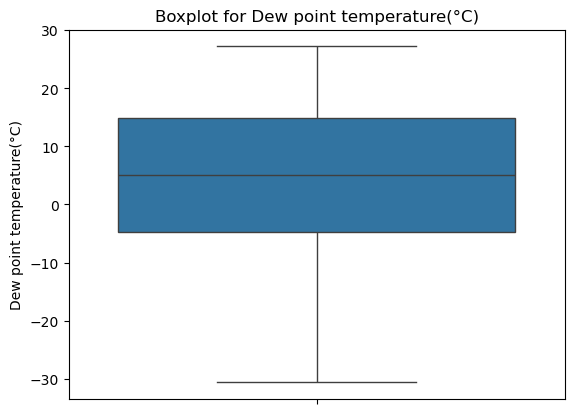

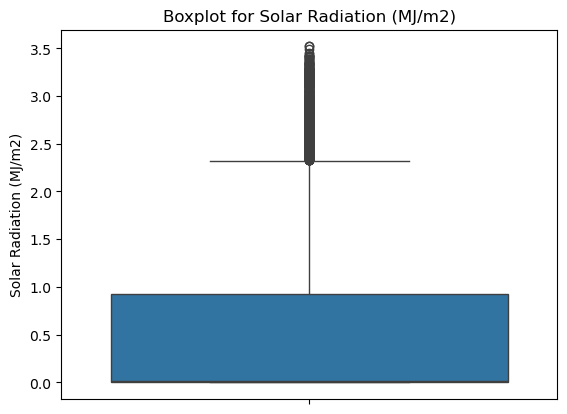

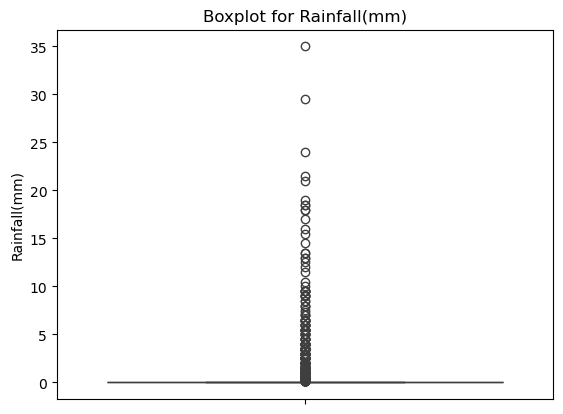

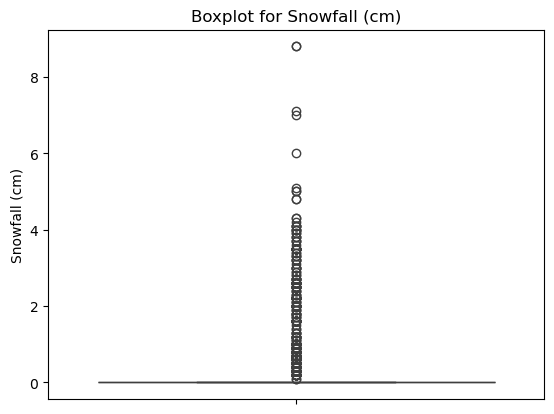

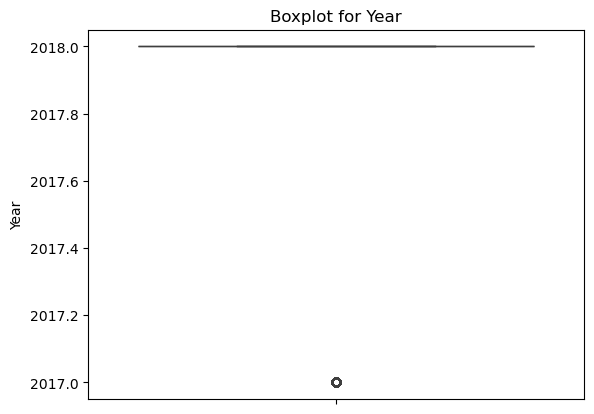

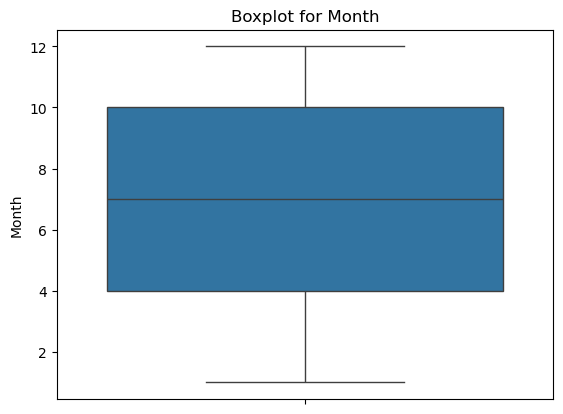

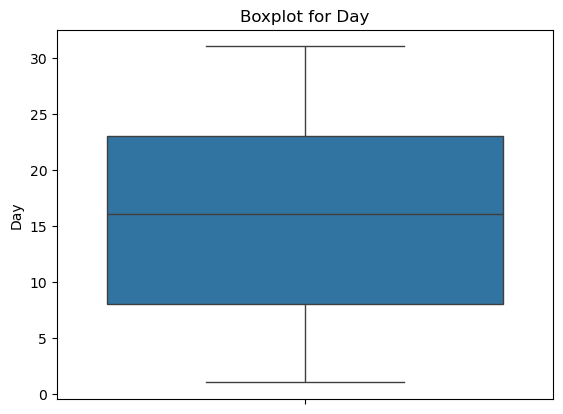

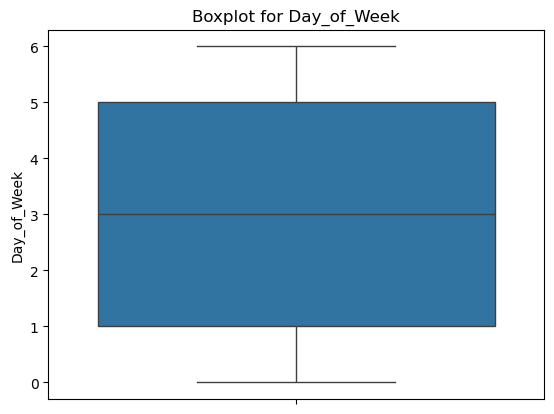

In [15]:
# Check for and remove outliers using statistical methods.
# Boxplot for numerical columns to visualize outliers.

for col in numerical_columns:
    plt.figure()
    sns.boxplot(numerical_columns[col])
    plt.title(f"Boxplot for {col}")

In [19]:
# for column in numerical_columns.columns:
    # plt.figure()
    # numerical_columns.boxplot(column=column)
    # plt.title(f"Boxplot for {column}") 

<Axes: ylabel='Rented Bike Count'>

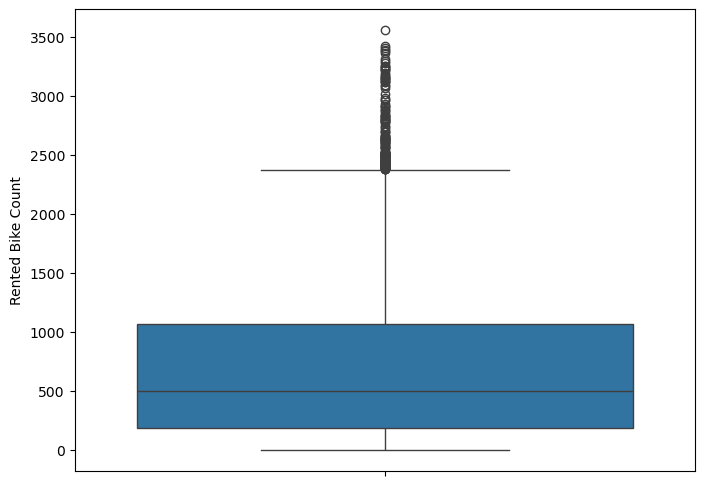

In [16]:
# Check outliers for Rented Bike Count alone
plt.figure(figsize=(8,6))
sns.boxplot(df['Rented Bike Count'])

In [12]:
# Define function for handling outlier using IQR

def handle_outliers_iqr(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower=Q1-(1.5*IQR)
        upper=Q3+(1.5*IQR)
        
        # Cap the outliers using capping (Winsorizing)
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
        # Applies a function to each value (x) in the column col.
        # If x is less than lower, it replaces x with lower.
        # If x is greater than upper, it replaces x with upper.
        # Otherwise, it keeps x as is.
    return df

df1=handle_outliers_iqr(df)

In [13]:
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_of_Week
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


<Axes: ylabel='Rented Bike Count'>

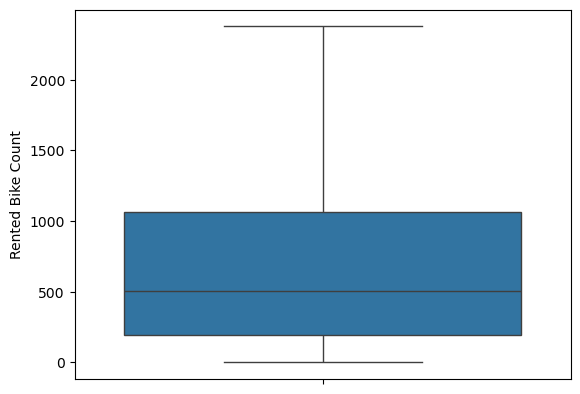

In [14]:
# Check outliers for Rented Bike Count alone after removing outliers
sns.boxplot(df1['Rented Bike Count'])

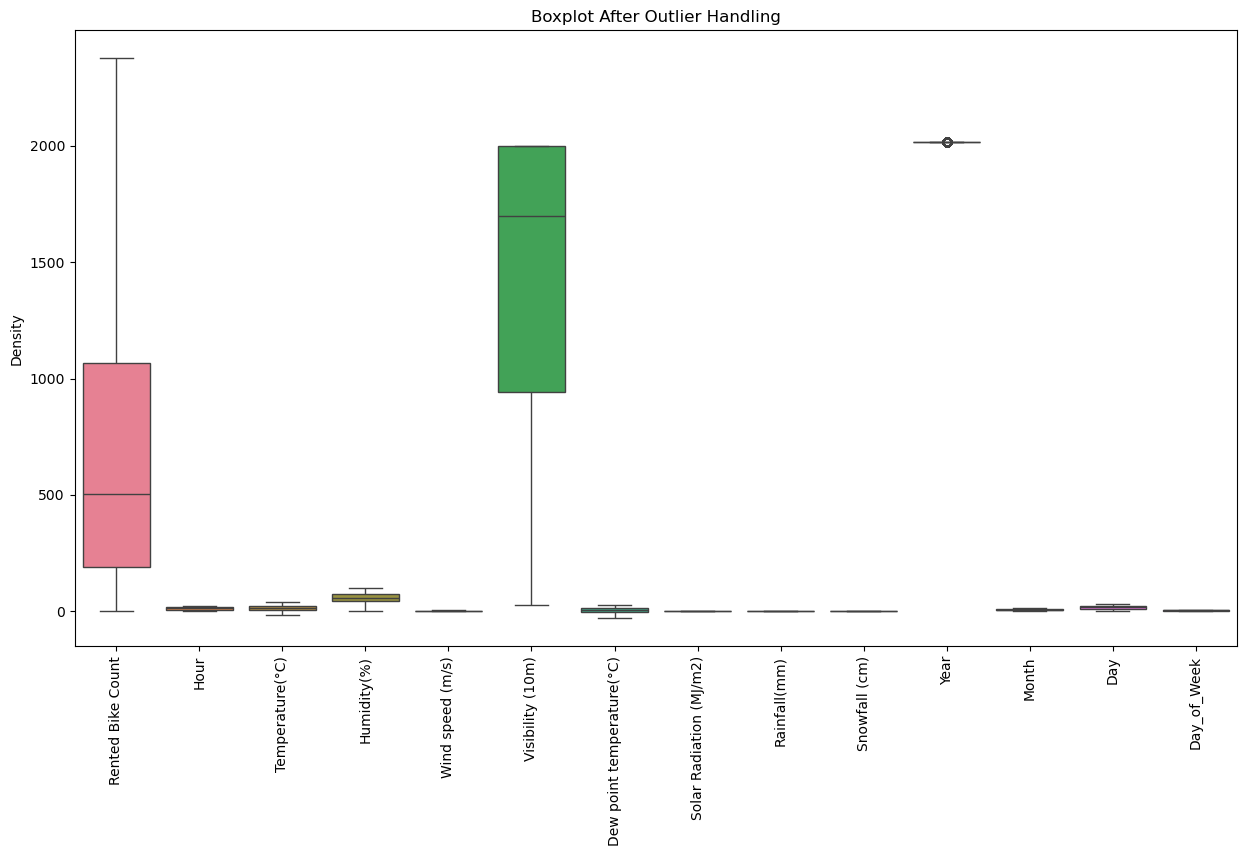

In [15]:
# Boxplot After removing outliers for all columns
plt.figure(figsize=(15,8))
sns.boxplot(data = df1)
plt.title("Boxplot After Outlier Handling")
plt.xticks(rotation=90)
plt.ylabel('Density')
plt.show()

In [25]:
# Address skewed data in numerical features through transformations.

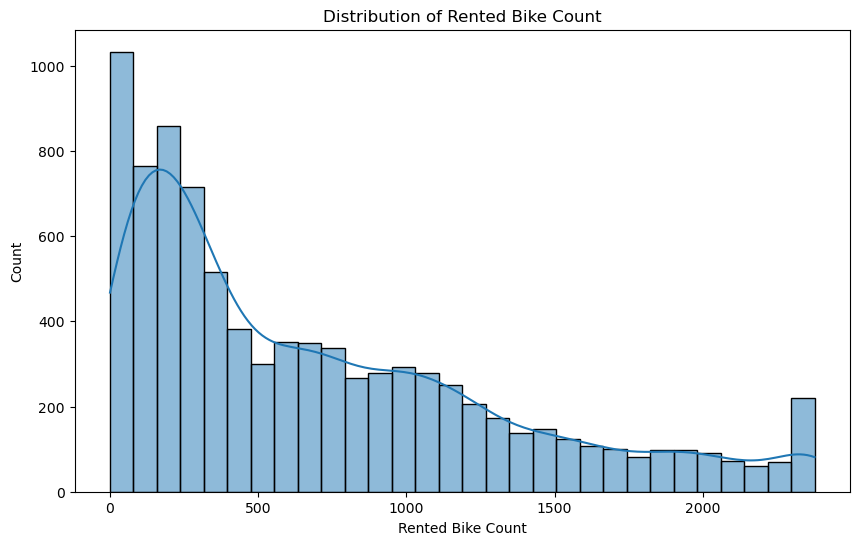

In [16]:
# Histogram Plot to visualize skewness in Rented Bike Count column
plt.figure(figsize=(10,6))
sns.histplot(df1['Rented Bike Count'], bins = 30, kde = True)
plt.title('Distribution of Rented Bike Count')  
plt.show()

In [17]:
# Check skewness of numerical features of df1
numerical_features = df1.select_dtypes(include=['number']).columns
print(df1[numerical_features].skew())

Rented Bike Count            1.003266
Hour                         0.000000
Temperature(°C)             -0.198326
Humidity(%)                  0.059579
Wind speed (m/s)             0.714700
Visibility (10m)            -0.701786
Dew point temperature(°C)   -0.367298
Solar Radiation (MJ/m2)      1.267346
Rainfall(mm)                 0.000000
Snowfall (cm)                0.000000
Year                        -2.978262
Month                       -0.010458
Day                          0.007522
Day_of_Week                 -0.003771
dtype: float64


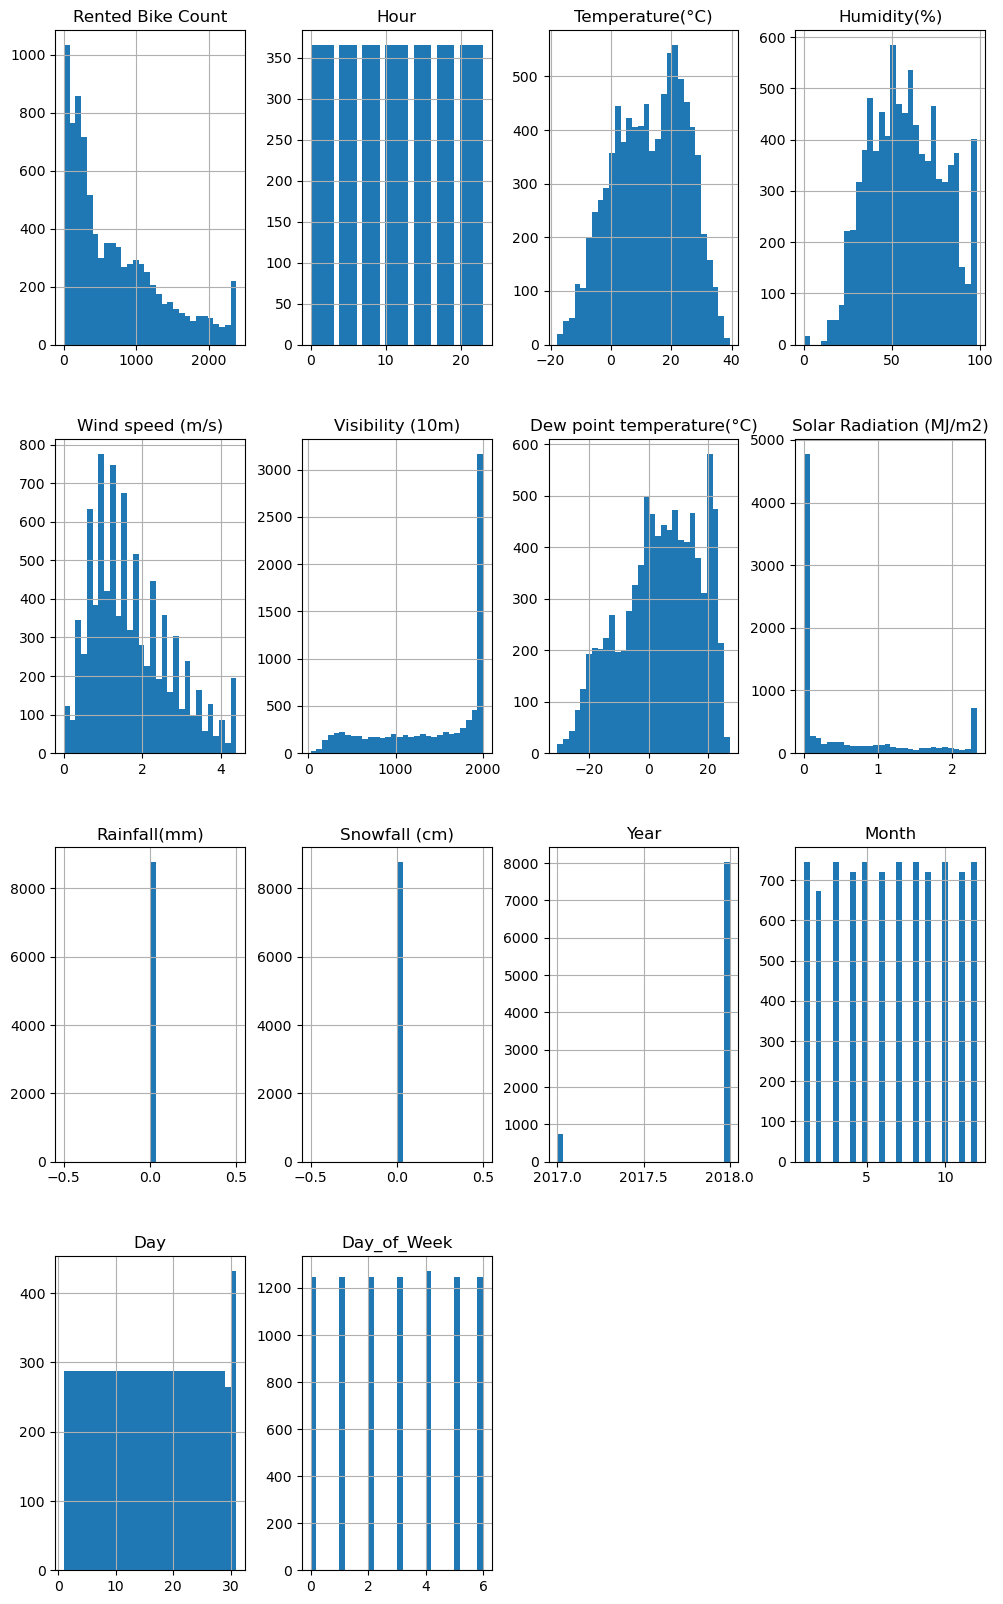

In [23]:
# Plot histograms before transforming features
df1.hist(figsize=(12, 20), bins=30)
plt.show()

In [18]:
# Check correlation of numerical columns
df_num_cols = df1.select_dtypes(['number'])
df_num_cols.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Day_of_Week
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,12,1,4
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,12,1,4
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,12,1,4


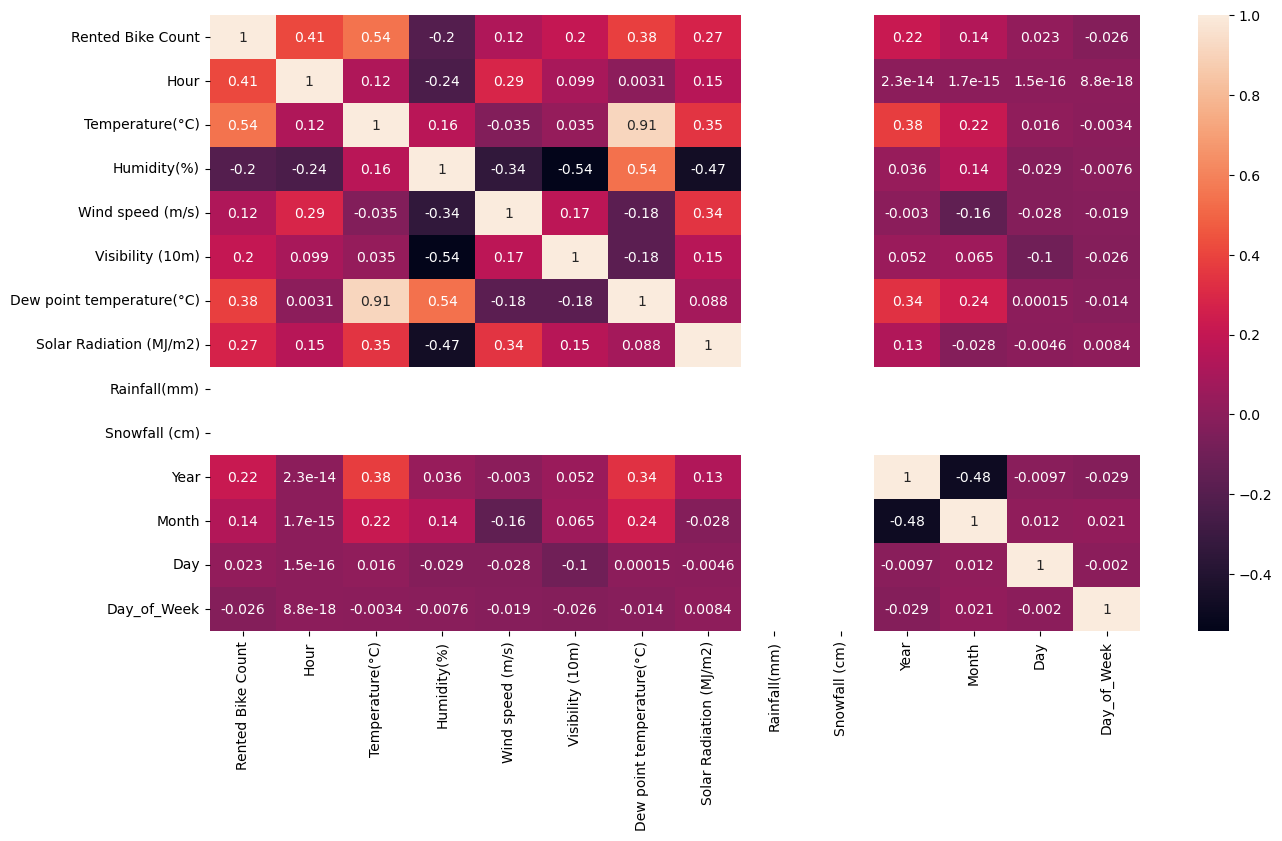

In [19]:
# Plot correlation
plt.figure(figsize = (15,8))
sns.heatmap(df_num_cols.corr(),annot = True)
plt.show()

In [21]:
# Here all the features are less correlated, so can perform tranformation to all of them.
# Some features have negative coorelation, maybe a chance of getting NULL values after transformation.
# Apply square root transformation

df_trans = np.sqrt(df_num_cols)
print(df_trans.skew())

Rented Bike Count            0.186404
Hour                        -0.740020
Temperature(°C)             -0.603670
Humidity(%)                 -0.496054
Wind speed (m/s)            -0.079899
Visibility (10m)            -1.014492
Dew point temperature(°C)   -0.594209
Solar Radiation (MJ/m2)      0.727934
Rainfall(mm)                 0.000000
Snowfall (cm)                0.000000
Year                        -2.978262
Month                       -0.433865
Day                         -0.488258
Day_of_Week                 -0.826530
dtype: float64


In [22]:
df_trans.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Day_of_Week
0,15.937377,0.000000,NaN,6.082763,1.483240,44.72136,NaN,0.0,0.0,0.0,44.911023,3.464102,1.0,2.0
1,14.282857,1.000000,NaN,6.164414,0.894427,44.72136,NaN,0.0,0.0,0.0,44.911023,3.464102,1.0,2.0
2,13.152946,1.414214,NaN,6.244998,1.000000,44.72136,NaN,0.0,0.0,0.0,44.911023,3.464102,1.0,2.0
3,10.344080,1.732051,NaN,6.324555,0.948683,44.72136,NaN,0.0,0.0,0.0,44.911023,3.464102,1.0,2.0
4,8.831761,2.000000,NaN,6.000000,1.516575,44.72136,NaN,0.0,0.0,0.0,44.911023,3.464102,1.0,2.0


In [23]:
df_trans.isnull().sum()

Rented Bike Count               0
Hour                            0
Temperature(°C)              1433
Humidity(%)                     0
Wind speed (m/s)                0
Visibility (10m)                0
Dew point temperature(°C)    3138
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Year                            0
Month                           0
Day                             0
Day_of_Week                     0
dtype: int64

In [24]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   float64
 2   Temperature(°C)            7327 non-null   float64
 3   Humidity(%)                8760 non-null   float64
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   float64
 6   Dew point temperature(°C)  5622 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Year                       8760 non-null   float64
 11  Month                      8760 non-null   float64
 12  Day                        8760 non-null   float64
 13  Day_of_Week                8760 non-null   float

In [ ]:
# Here Temperature(°C) and Dew point temperature(°C) have got some NULL values after transformation.
# It can be replaced by the median values, because it has +ve and -ve entries.

In [25]:
df_trans['Temperature(°C)'].median()

4.135214625627067

In [26]:
df_trans['Dew point temperature(°C)'].median()

3.4641016151377544

In [27]:
df_trans['Dew point temperature(°C)'].fillna(df_trans['Dew point temperature(°C)'].median(), inplace=True)
df_trans['Temperature(°C)'].fillna(df_trans['Temperature(°C)'].median(), inplace=True)

In [28]:
df_trans.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Year                         0
Month                        0
Day                          0
Day_of_Week                  0
dtype: int64

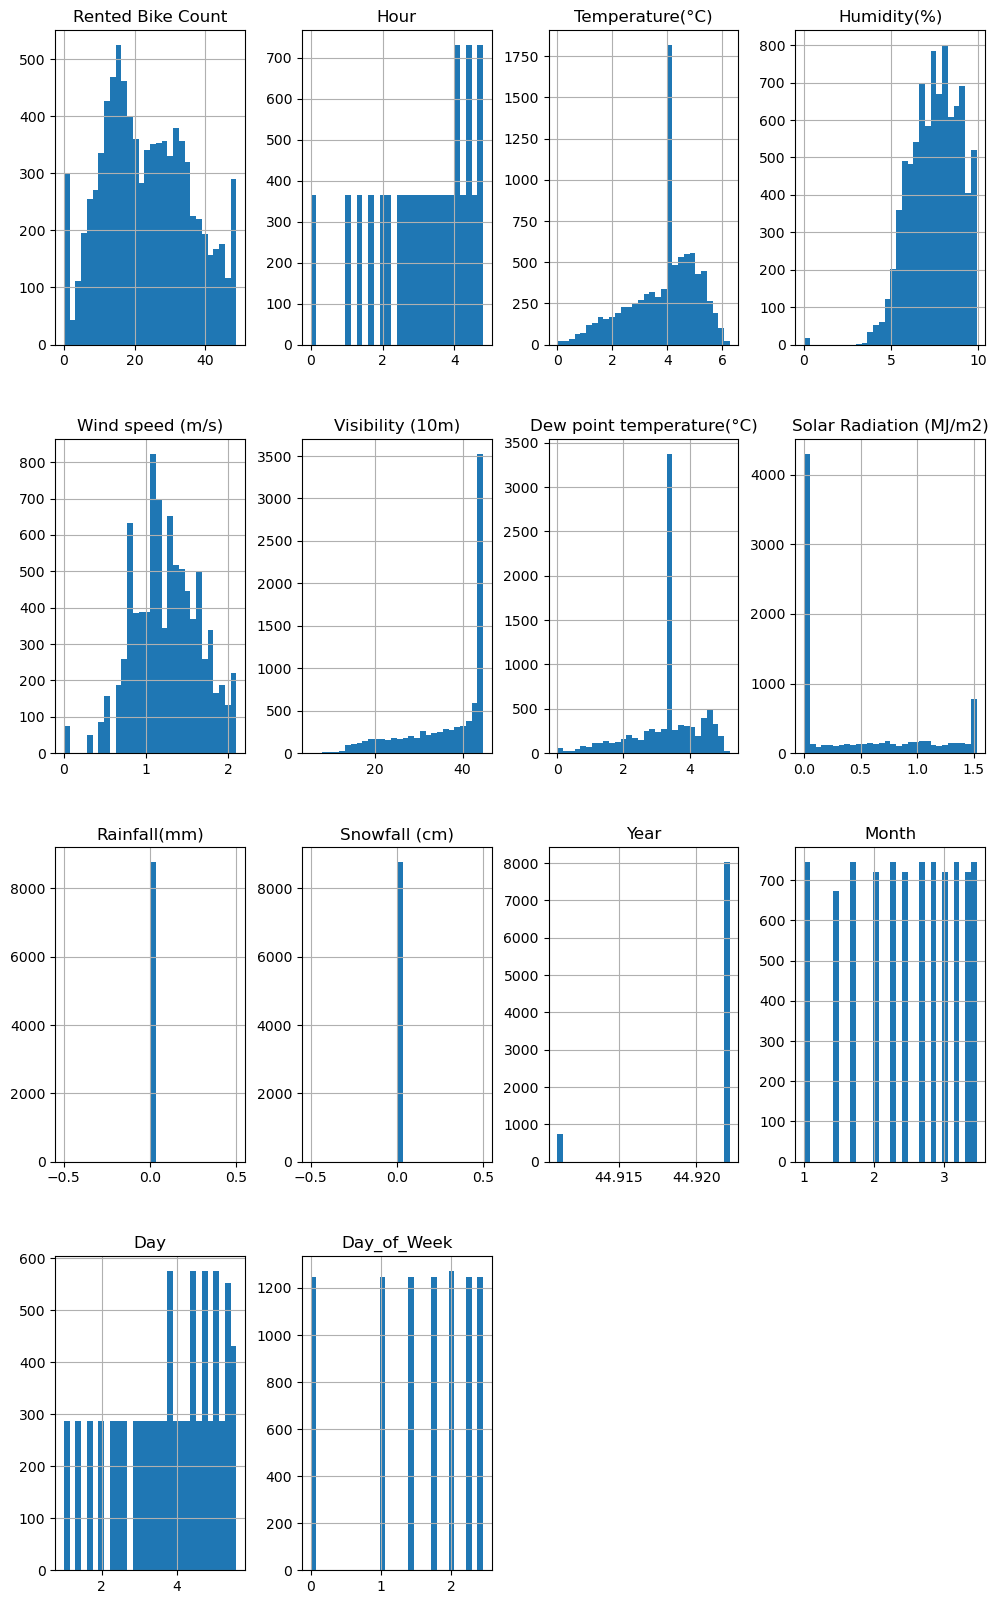

In [38]:
# Plot histograms after transforming features
df_trans.hist(figsize=(12, 20), bins=30)
plt.show()

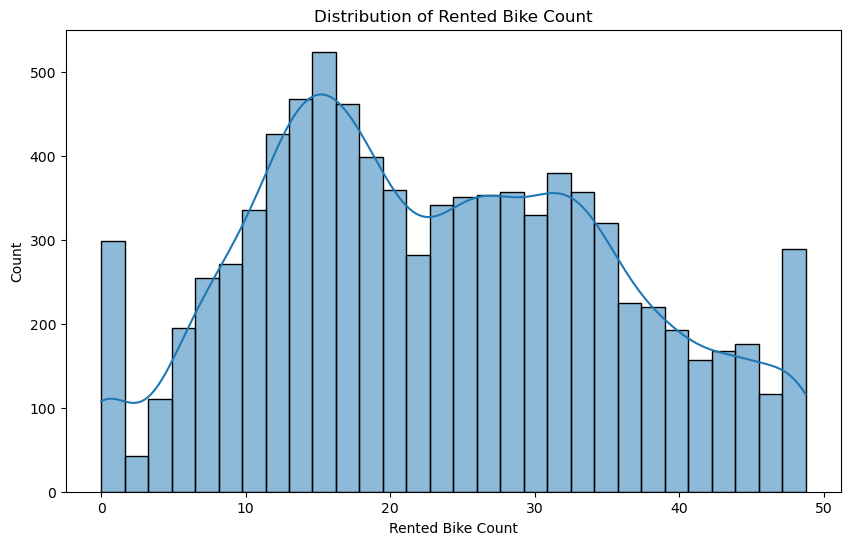

In [29]:
# Histogram Plot to visualize skewness in Rented Bike Count column after transformation
plt.figure(figsize=(10,6))
sns.histplot(df_trans['Rented Bike Count'], bins = 30, kde = True)
plt.title('Distribution of Rented Bike Count')  
plt.show()

### Exploratory Data Analysis (EDA):

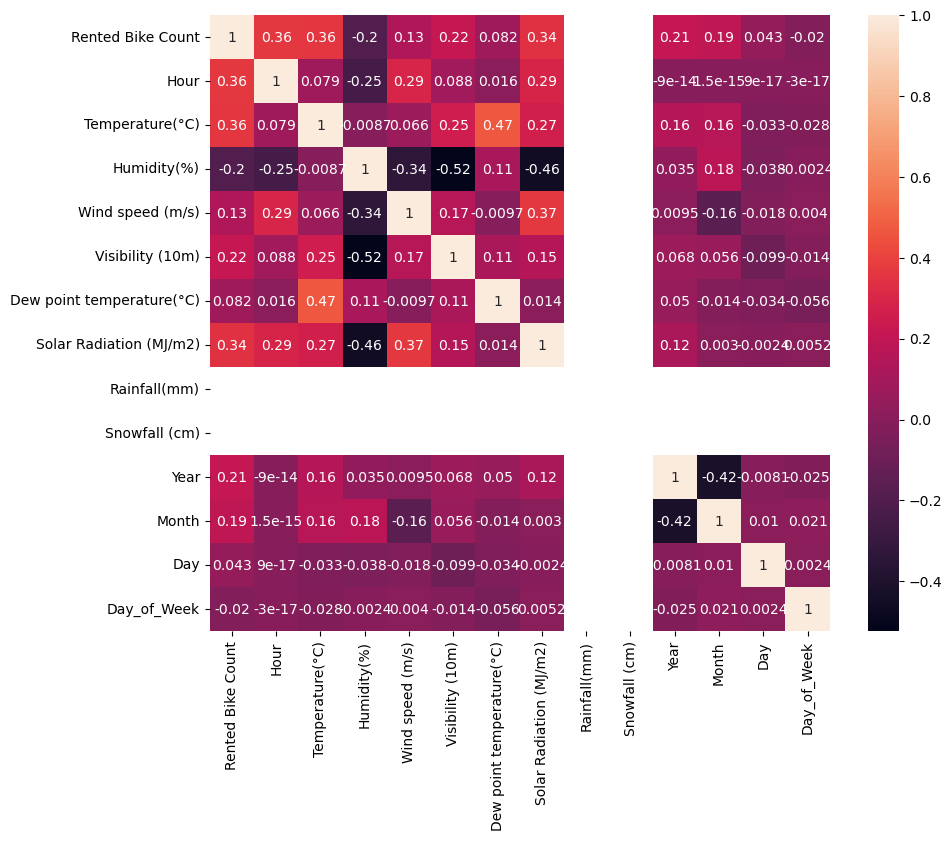

In [40]:
# Plot correlation after skewness transformation
# Columns from transformed data

plt.figure(figsize = (10,8))

sns.heatmap(df_trans.corr(),annot = True)
plt.show()

In [36]:
# Correlation and skewness improved slightly, another transformation may result to form NULL values.

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

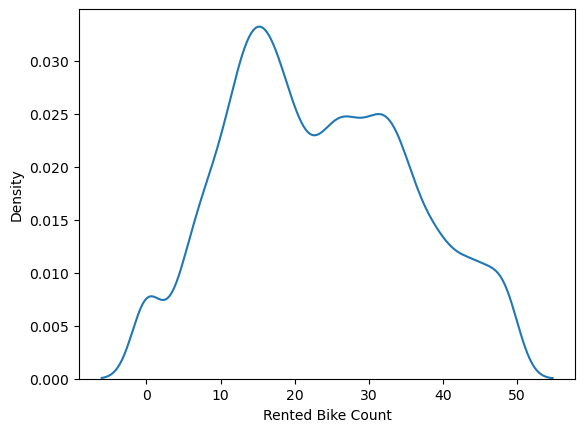

In [30]:
# Kernel Density Estimation (KDE) Plot
sns.kdeplot(df_trans['Rented Bike Count'])

### Feature Engineering:

In [31]:
# Encoding categorical features using OneHot Encoding
# Categorical columns
df_cat_cols = df1.select_dtypes(['object']) 
df_cat_cols.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [32]:
# Onehot encoding

df_encode = pd.get_dummies(df_cat_cols)

In [33]:
df_encode.head()

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,False,False,False,True,False,True,False,True
1,False,False,False,True,False,True,False,True
2,False,False,False,True,False,True,False,True
3,False,False,False,True,False,True,False,True
4,False,False,False,True,False,True,False,True


In [34]:
# Convert boolean to integers

df_encode = df_encode.astype(int)
df_encode.head()

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,1,0,1,0,1
3,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,1


In [42]:
# Concatenate Numerical column and Categorical column

In [35]:
df_data = pd.concat([df_trans, df_encode],axis = 1)

In [36]:
df_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Day,Day_of_Week,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,15.937377,0.000000,4.135215,6.082763,1.483240,44.72136,3.464102,0.0,0.0,0.0,...,1.0,2.0,0,0,0,1,0,1,0,1
1,14.282857,1.000000,4.135215,6.164414,0.894427,44.72136,3.464102,0.0,0.0,0.0,...,1.0,2.0,0,0,0,1,0,1,0,1
2,13.152946,1.414214,4.135215,6.244998,1.000000,44.72136,3.464102,0.0,0.0,0.0,...,1.0,2.0,0,0,0,1,0,1,0,1
3,10.344080,1.732051,4.135215,6.324555,0.948683,44.72136,3.464102,0.0,0.0,0.0,...,1.0,2.0,0,0,0,1,0,1,0,1
4,8.831761,2.000000,4.135215,6.000000,1.516575,44.72136,3.464102,0.0,0.0,0.0,...,1.0,2.0,0,0,0,1,0,1,0,1


### Feature Selection:

In [37]:
# Use Select K Best algorithm to identify relevant features
# For this, need to split X and y features
# Feature Selection

X = df_data.drop('Rented Bike Count', axis=1)
y = df_data['Rented Bike Count']

In [38]:
X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year',
       'Month', 'Day', 'Day_of_Week', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes'],
      dtype='object')

In [39]:
print(y)

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8760, dtype: float64


In [40]:
# Feature selection using SelectKBest, f_regression
# Applying F_Regression for feature selection

selector = SelectKBest(score_func=f_regression, k=15)   #Select top 15 features
X_kbest = selector.fit_transform(X, y)

In [41]:
# Get selected features name and score
selected_features_kbest = X.columns[selector.get_support()]  # Get columns in selector from whole x columns, get_support checks boolean values
all_feature_scores = pd.DataFrame({'All Feature':X.columns, 'Score':selector.scores_}).sort_values(by='Score', ascending = False)

print("Selected Features:",selected_features_kbest)
print(all_feature_scores)

Selected Features: Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Year', 'Month',
       'Seasons_Autumn', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes'],
      dtype='object')
                  All Feature        Score
16             Seasons_Winter  1968.265590
0                        Hour  1331.489976
1             Temperature(°C)  1309.255155
20        Functioning Day_Yes  1257.314591
19         Functioning Day_No  1257.314591
6     Solar Radiation (MJ/m2)  1160.889230
15             Seasons_Summer   940.217346
4            Visibility (10m)   442.640147
9                        Year   401.229507
2                 Humidity(%)   371.765177
10                      Month   345.354607
3            Wind speed (m/s)   162.344571
17            Holiday_Holiday    65.448583
18         Holiday_No Holiday    65.448583
13             Seas

### Split Data into Training and Testing Sets:

In [42]:
# Split the selected data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size = 0.2, random_state = 42)

In [43]:
# Output the shapes of the new training and testing sets

print("Training set shape (features):", X_train.shape) 
print("Testing set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Testing set shape (target):",y_test.shape)

Training set shape (features): (7008, 15)
Testing set shape (features): (1752, 15)
Training set shape (target): (7008,)
Testing set shape (target): (1752,)


### Feature Scaling:

Scale numerical features if necessary to ensure uniform magnitude using techniques like
Min-Max scaling or Standardization

In [45]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [47]:
# Convert back to DataFrame for easier handling
X_normalized_df = pd.DataFrame(X_train_scaled, columns=selected_features_kbest)
print(X_normalized_df.head())

       Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  0.576970        -0.203692     0.221761          1.814086         -1.039274   
1 -0.128321         0.735797     1.256094          0.135139         -1.419994   
2  0.969545        -0.437331    -0.504789         -0.166682         -0.758981   
3  1.322547         0.205655     0.572607          0.411309          0.123501   
4  1.237381         1.086382     0.740390         -0.062770         -0.525151   

   Solar Radiation (MJ/m2)      Year     Month  Seasons_Autumn  \
0                 0.959899  0.301793  1.173868        1.731392   
1                 0.706584  0.301793  0.010667       -0.577570   
2                -0.836530  0.301793  1.173868        1.731392   
3                -0.836530  0.301793 -1.378084       -0.577570   
4                -0.836530  0.301793  0.273938       -0.577570   

   Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
0       -0.577790       -0.568342        -

### Build the ML Model:

In [48]:
# Model Building
models={
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regression' : DecisionTreeRegressor(),
    '3. Random Forest Regression' : RandomForestRegressor(),
    '4. Gradient Boosting Regression' : GradientBoostingRegressor(),
    '5. Support Vector Regression' : SVR(),
}

In [49]:
# Applying each model

results={} # use to store evaluation result

for model_name, model in models.items():
    
    # fit the model
    model.fit(X_train_scaled, y_train)
    
    # make the prediction
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the results
    results[model_name] = {'MSE' : mse, 'MAE' : mae, 'R2' : r2, 'RMSE' : rmse}

### Model Evaluation:

In [50]:
results_df = pd.DataFrame(results).T
print(results_df)

                                       MSE       MAE        R2      RMSE
1. Linear Regression             64.940991  6.400920  0.569146  8.058597
2. Decision Tree Regression      35.787516  3.726657  0.762566  5.982267
3. Random Forest Regression      18.829368  2.830071  0.875076  4.339282
4. Gradient Boosting Regression  21.279387  3.307311  0.858821  4.612959
5. Support Vector Regression     39.082366  4.359155  0.740706  6.251589


In [ ]:
# Here comparing R2_Score of each models, the Random Forest Regression has the highest score.
# So we are taking Random Forest Regression as the best model.